# Exercise 5

In [1]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku
import numpy as np

In [10]:
tokenizer = Tokenizer()

data = open('sonnets.txt').read()

corpus = data.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

1. Create the LSTM model

In [20]:
model = Sequential()
model.add(Embedding(total_words, 64, input_length=max_sequence_len-1))
model.add(LSTM(150, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(units=64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words, activation='softmax'))
# Pick an optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 10, 64)            216000    
                                                                 
 lstm_18 (LSTM)              (None, 10, 150)           129000    
                                                                 
 dropout_9 (Dropout)         (None, 10, 150)           0         
                                                                 
 lstm_19 (LSTM)              (None, 100)               100400    
                                                                 
 dense (Dense)               (None, 64)                6464      
                                                                 
 dense_1 (Dense)             (None, 3375)              219375    
                                                                 
Total params: 671239 (2.56 MB)
Trainable params: 67123

In [23]:
 history = model.fit(predictors, label, epochs=300, verbose=1)

Epoch 1/300
484/484 [==============================] - 4s 8ms/step - loss: 1.4407 - accuracy: 0.7337
Epoch 2/300
484/484 [==============================] - 4s 9ms/step - loss: 1.4264 - accuracy: 0.7355
Epoch 3/300
484/484 [==============================] - 4s 7ms/step - loss: 1.4298 - accuracy: 0.7364
Epoch 4/300
484/484 [==============================] - 4s 7ms/step - loss: 1.4253 - accuracy: 0.7381
Epoch 5/300
484/484 [==============================] - 5s 10ms/step - loss: 1.4291 - accuracy: 0.7349
Epoch 6/300
484/484 [==============================] - 4s 7ms/step - loss: 1.4260 - accuracy: 0.7359
Epoch 7/300
484/484 [==============================] - 4s 7ms/step - loss: 1.4207 - accuracy: 0.7399
Epoch 8/300
484/484 [==============================] - 4s 8ms/step - loss: 1.4217 - accuracy: 0.7361
Epoch 9/300
484/484 [==============================] - 4s 9ms/step - loss: 1.4173 - accuracy: 0.7351
Epoch 10/300
484/484 [==============================] - 4s 7ms/step - loss: 1.4316 - accur

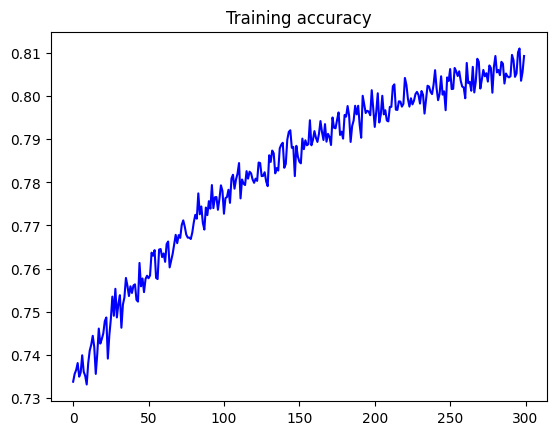

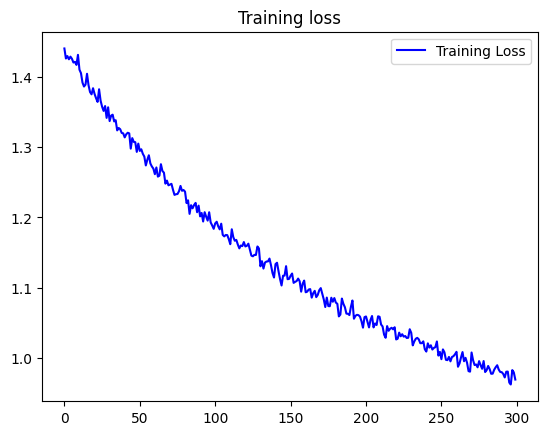

In [26]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [27]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100

for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = np.argmax(model.predict(token_list), axis=1)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

1/1 [==============================] - 0s 53ms/step
Help me Obi Wan Kenobi, you're my only hope to complain dyed brought say new moan in still outlive tell inward worst in pry sight ornament back keep depart bright prove thine reasons done hate say blind worthy heart will 'will' ' did give full forth stay that injury of time's suppose win sad thing worthy truly say right true patience prove will tell ' that which strangely barren best than dwell shalt rare delight of best sovereign shame grow fair best ' shalt shalt compare death shalt make worms white grow gay of minds spent did grace takes still best prove shalt remain brought ' appear till moan
